## Image Filters (Introduction to CNNs)

Here are various filters (i.e. kernels) applied to an input image. Notice the change in outcome resulting from change in kernel values.

### The Input Image

Here's a picture I took in Nanjing during Decembe 2019 (right before coronavirus struck!) -- we'll be using this as our input image. 

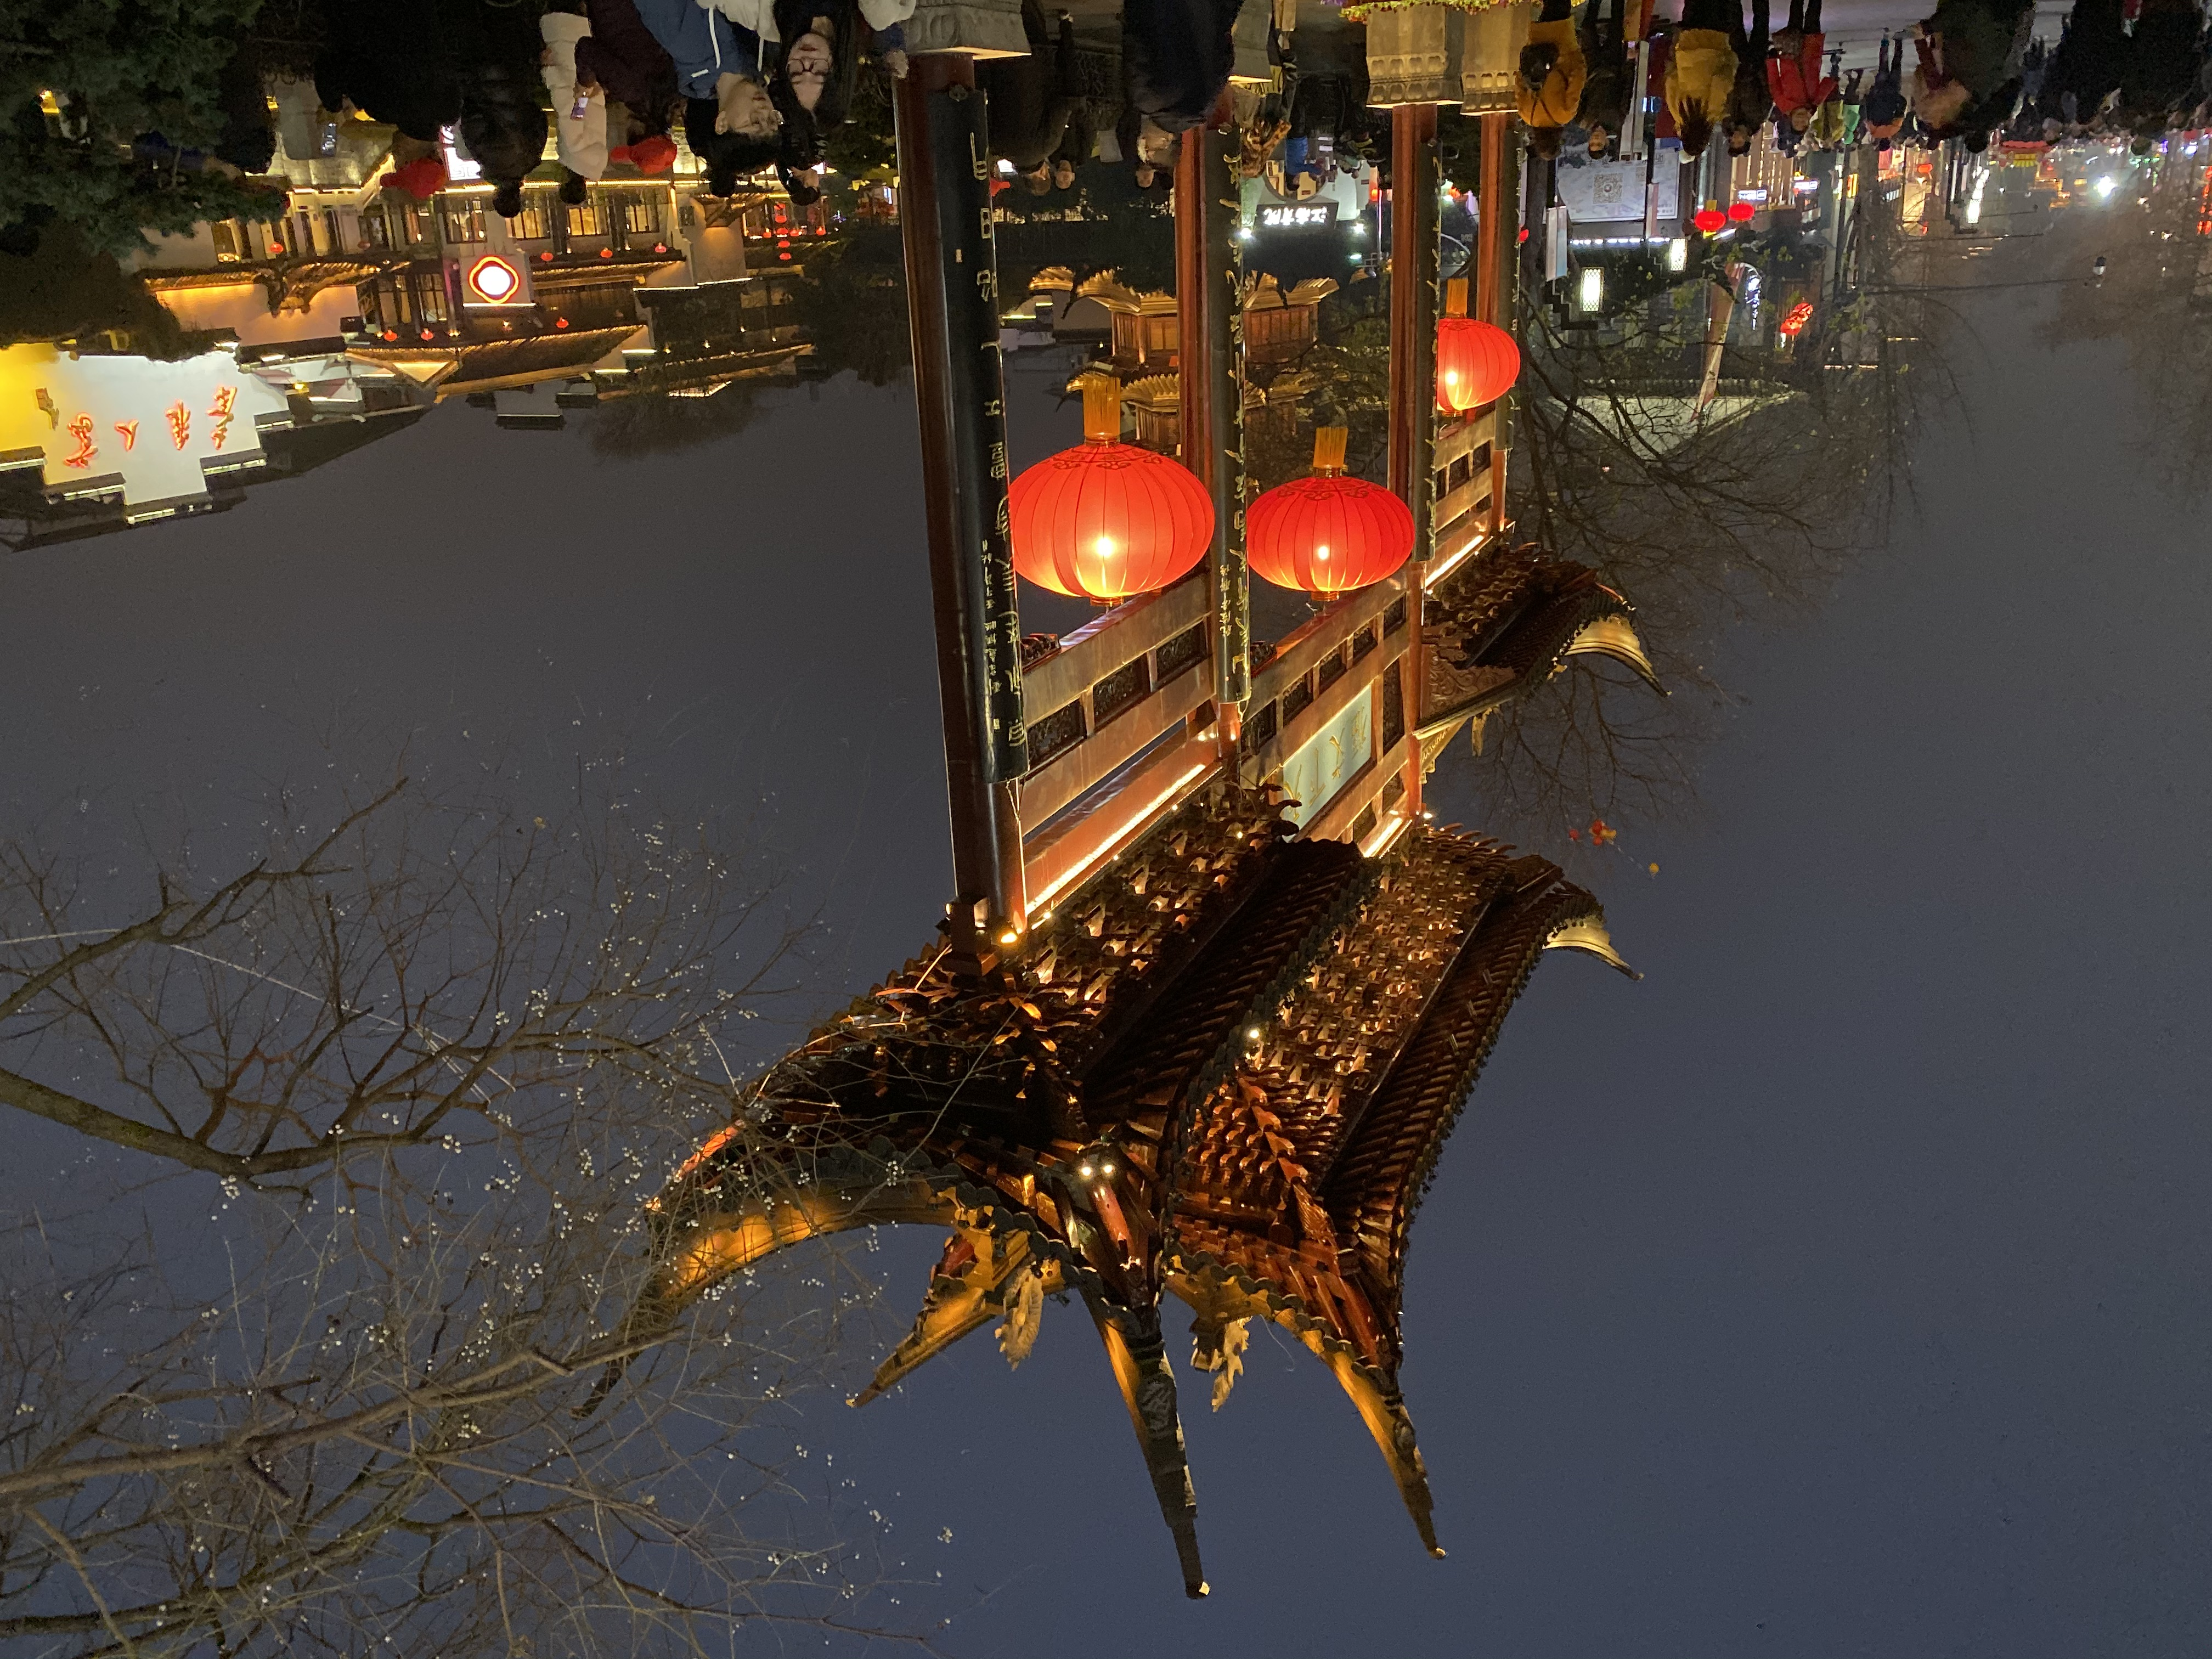

Let's convert this image to grayscale and read it as a matrix so that we can perform some image manipulation.

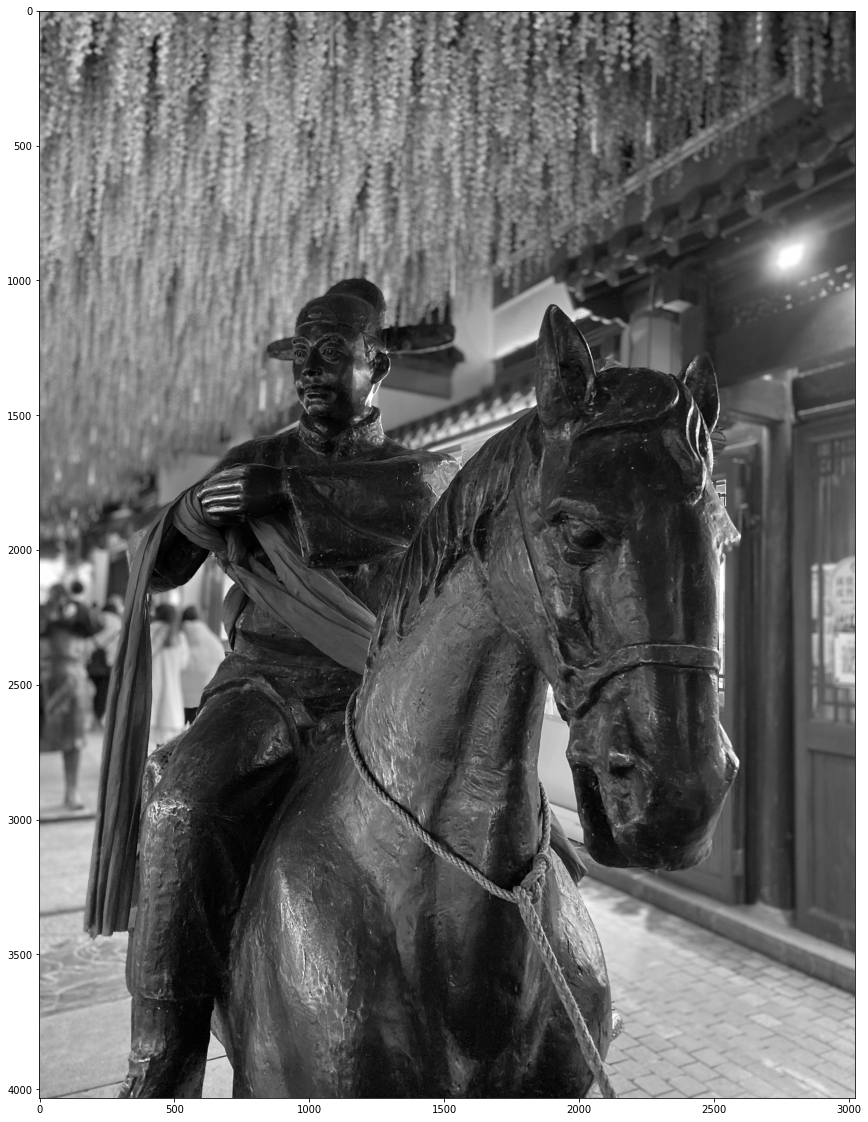

In [207]:
import numpy as np
import cv2
from PIL import Image
from PIL import ImageOps

nanjing = cv2.imread("Statue.jpg", 0) 
plt.figure(figsize = (20,20))
imgplot = plt.imshow(nanjing, origin='upper', cmap="gray")

### Naive Edge Detection

Here we can use mixture of filter for edge detection: 

$$ \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\ 
-1 & 0 & 1 
\end{bmatrix} \hspace $$ \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\ 
-1 & 0 & 1 
\end{bmatrix} $$ $$ 

Let's see what happens when we apply this to our input image. Here, "application" simply means element-wise multiplication, followed by aggregation across the $3^2 = 9$ output values from the kernel.

In [208]:
X = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Y = X.T

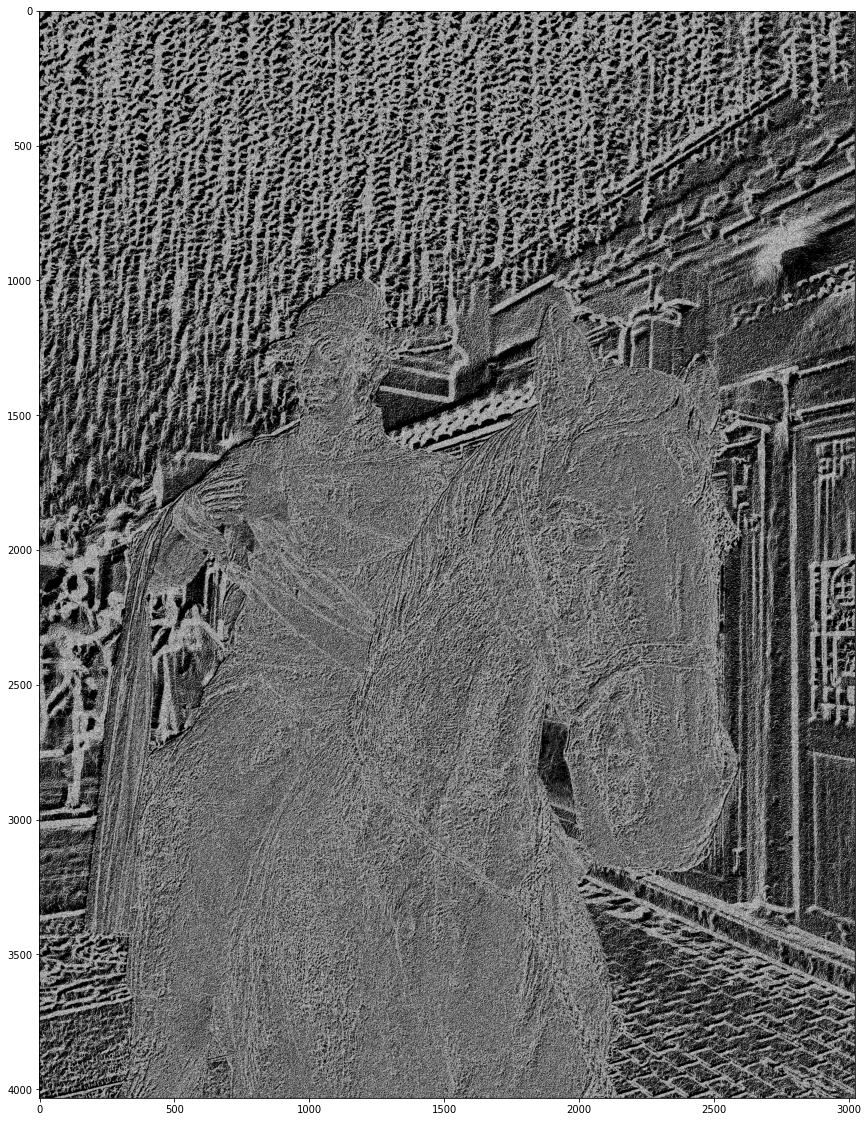

In [209]:
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

 
X_approx = cv2.filter2D(nanjing, -1, X)
Y_approx = cv2.filter2D(nanjing, -1, Y)

gradient_magnitude = np.sqrt(np.square(X_approx) + np.square(Y_approx))
gradient_magnitude *= 255.0 / gradient_magnitude.max()
gradient_magnitude = gradient_magnitude.astype('uint8')

plt.figure(figsize = (20,20))
imgplot = plt.imshow(gradient_magnitude, origin='upper', cmap="gray")

### Sharpen

We can use another simple kernel to create a sharpening effect: 

$$ \begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ 
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}
\end{bmatrix} $$ 

Here's the output:

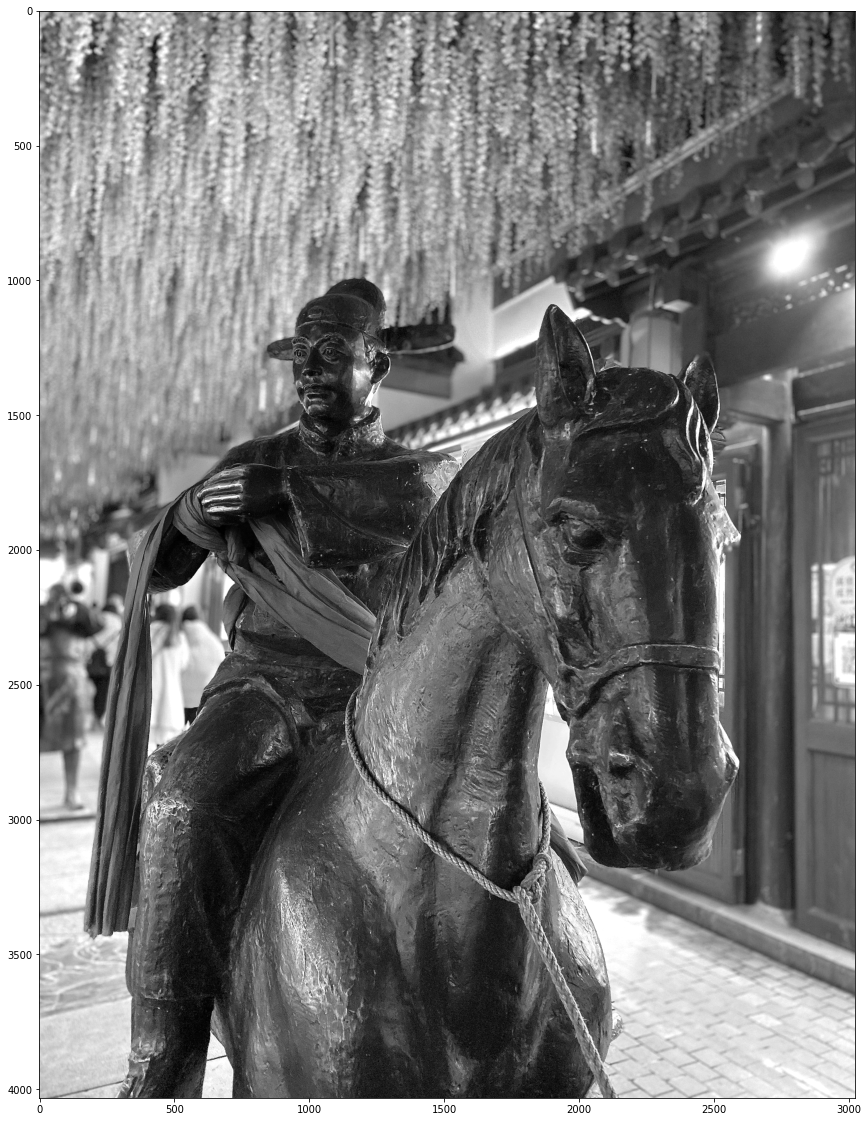

In [217]:
sharpen_kernel = np.array([[0, -1, 0], [-1, 5.2, -1], [0, -1, 0]])
sharpened = cv2.filter2D(nanjing, -1, sharpen_kernel)

plt.figure(figsize = (20,20))
plt.imshow(sharpened, origin='upper', cmap="gray");